## Tutorial 7. Probability distributions


Created by Emanuel Flores-Bautista 2019.  All content contained in this notebook is licensed under a [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/). The code is licensed under a [MIT license](https://opensource.org/licenses/MIT). This notebook was based on the BeBi103 class from the amazing Justin Bois. 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as st

import matplotlib.pyplot as plt
import TCD19_utils as TCD

TCD.set_plotting_style_2()

#Magic command to enable plotting inside notebook
%matplotlib inline

#Magic command to enable svg format in plots
%config InlineBackend.figure_format = 'svg'

np.random.seed(20)

## A necessary rant on probability and statistics

### Why probabilty ?

Data science is inherently a statistical subject. When analyzing large amounts of data we need to know how randomness could affect our observations and how sure can we be about a certain conclusion given our data. 

One could also argue that an important subject to learn from would be linear algebra as it is the basis for most of the manipulations that are working under the hood in the machine learning models we will see in the next module. While this is true, this workshop is not focused solely on machine learning, but on data science as a whole. Therefore, I think that a proper refreshing on probability and statistics is necessary for a better understanding of the types of things we can do with data analysis. 

Probabiltiy can indeed be a very hard subject because of the inherent mathematical and conceptual complexity behind it. However, we will take a very practical approach and see how we can use the tools from probability and statistics to get a better sense of our data, through the abstraction into certain "summary statistics" and to develop an intuition to understand the models we'll use in the next module and to  create more complex mathematical models in the future.

It is because of this complexity that it was hard for me to even design this module as I'm trying to re-learn probability and statistics to delve into bayesian inference, information theory, statitstical physics and stochastic modeling of genetic circuits. 

### Distinction between bayesian and frequentist statistics. 

Frequentists : Think of how classical stats courses are taught. The frequentist conception of probability $P(A)$of an event A is 

represents a long-run frequency over a
large number of identical repetitions of an experiment.

\begin{align}
P(A) = \frac{ \text{number of outcomes that favour event A}}{\text{total number of outcomes}}
\end{align}


Bayesian: bayesian stats in the other hand, "guesses" a probability in terms of our confidence that a given event might happen, and updates that guess with the more data. 


Bayesian inference allows us to have an intuition like the following image: 

In [16]:
from IPython.display import Image


In [18]:
Image(url= "https://raw.githubusercontent.com/zonination/perceptions/master/joy1.png", 
      width=400, height=400)

While bayesian inference is beyond the scope of this course, you can readily see that bayesian inference is the more "common" thing to us humans. We tend to think of a certain event given the information we know. This beautiful visualization captions our way of thinking. (joyplot)

After this rant we can now start talking about some important concepts in probability and the stories behind different distributions. The amazing thing about what we'll see now is that most of the things that happen in our world can be described by the following distributions! Let's begin...

If you want to know more about the difference between frequentism and bayesianism read this great bog post from Jake Van der Plas: http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

### let's be non-binary/ stop using p-values

A P-value by definition is the probability of observing the test statistic being at least as extreme as what was measured if the null hypothesis is true.

Do not use p-values for a binary classification of statistical significance, believe me. *share papers on p-values  


## Key concepts

Random variable: any numerical value that varies with certain parameters. 

* Discrete: takes integer values

Probability mass function: 


* Continue: takes decimal values or `floats`

probability density function 

cumulative distribution function


## We all need a moment

Moments: mean and variance 

## Sampling and randomness



## Probability distributions 

### Bernoulli trials

Make plot from coin tosses.

### Geometric distribution

* **Story.** We perform a series of Bernoulli trials until we
get a success.  We have $k$ failures before the success.

* **Parameter.** The Geometric distribution is parametrized by a
single value, $p$, the probability that the Bernoulli trial is
successful.

* **Example.** 

* **Probability mass function.**

\begin{align}
f(k;p) = (1-p)^k p.
\end{align}


* **Notes.** The Geometric distribution is only defined for non-negative
integer $k$.

In [21]:
from scipy.stats import geom

In [22]:
ps = []
ks = []
pmfs = []

for k in np.arange(1, 11, 1):
    for p in np.linspace(0.1, .99, 10):
        
        p = round(p, 2)
        ps.append(p)
        ks.append(k)
        pmfs.append(geom.pmf(k, p))        

In [23]:
df = pd.DataFrame({'ps':ps, 'ks':ks , 'PMF': pmfs})

pivoted = df.pivot('ps', 'ks', 'PMF')

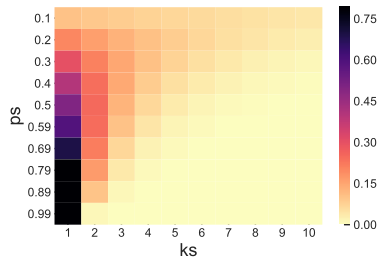

In [35]:
sns.heatmap(pivoted, cmap = 'magma_r', robust = True)

### Negative Binomial distribution

* **Story.** We perform a series of Bernoulli trials until we
get $n$ successes.  The number of failures, $k$, before we get $n$
successes is Negative Binomially distributed.

* **Parameters.** There are two parameters: the probability $p$
of success for each Bernoulli trial, and the desired number of
successes, $n$.

* **Example.** Bursty gene expression can give mRNA count
distributions that are Negative Binomially distributed.  Here,
"success" is that a burst in gene expression stops.  So, the
parameter $p$ is related to the length of a burst in expression (lower
$p$ means a longer burst).  The parameter $r$ is related to the
frequency of the bursts.  If multiple bursts are possible within the
lifetime of mRNA, then $n > 1$.  Then, the number of "failures" is
the number of mRNA transcripts that are made in the characteristic
lifetime of mRNA.

* **Probability mass function.**

\begin{align}
f(k;n,p) = \begin{pmatrix}
k+n-1 \\
n-1
\end{pmatrix}
p^n (1-p)^k.
\end{align}

Here, we use a combinatorial notation;

\begin{align}
  \begin{pmatrix}
k+n-1 \\
n-1
\end{pmatrix} = \frac{(k+n-1)!}{(n-1)!\,k!}.
\end{align}

Generally speaking, $n$ need not be an integer, so we may write the PMF as

\begin{align}
f(k;n, p) = \frac{\Gamma(k+n)}{\Gamma(n) k!}\,p^r(1-p)^k.
\end{align}


**Notes.** If $n = 1$, this distribution reduces to the Geometric
distribution.

In [118]:
st.nbinom.pmf(k = 3, p = 0.6 , n = 10)

0.08513637580799999

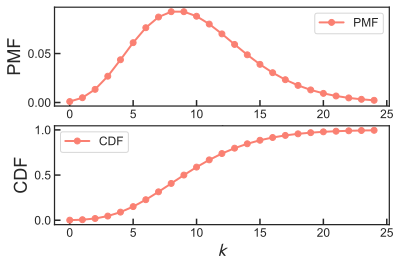

In [119]:
n = 10 
p = 0.5
ks = np.arange(0,25)

ks_plot = []
pmfs = []
cdfs = []

for i in ks:
    
    ks_plot.append(i)
    pmfs.append(st.nbinom.pmf(k = i, p = p, n = n))
    cdfs.append(st.nbinom.cdf(k = i, p = p, n = n))
    
plt.subplot(2,1,1)    
plt.plot(ks_plot, pmfs, '-o', color = 'salmon', label = 'PMF')  
plt.xlabel('$k$')
plt.ylabel('PMF')
plt.legend()

plt.subplot(2,1,2)
plt.plot(ks_plot, cdfs, '-o', color = 'salmon', label = 'CDF')  
plt.xlabel('$k$')
plt.ylabel('CDF')
plt.legend();

In [120]:
##Keeping n constant

n = 10 

ps = np.linspace(0.2, 0.99, 20)

ks = np.arange(1, 20)

ps_plot = []

ks_plot = []

nbinom_pmfs = []

for i in ps:
    for j in ks:
        ps_plot.append(np.round(i,2))
        ks_plot.append(j)
        nbinom_pmfs.append(st.nbinom.pmf(p = i, k = j, n = n))

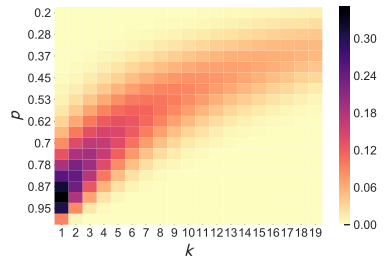

In [75]:
df = pd.DataFrame({'$p$':ps_plot, '$k$':ks_plot , 'PMF': nbinom_pmfs})

pivoted_nbinom = df.pivot('$p$', '$k$', 'PMF')

sns.heatmap(pivoted_nbinom, cmap = 'magma_r')

In [62]:
##Keeping k constant

k = 5

ps = np.linspace(0.1, 0.99, 20)

ns = np.arange(0, 20)

ps_plot = []

ns_plot = []

nbinom_pmfs = []

for i in ps:
    for j in ns:
        ps_plot.append(np.round(i,2))
        ns_plot.append(j)
        nbinom_pmfs.append(st.nbinom.pmf(p = i, k = k, n = j))

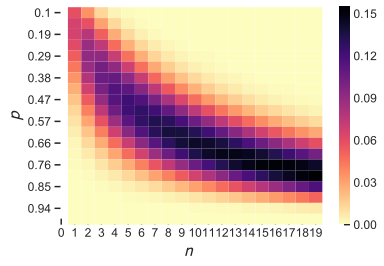

In [63]:
df = pd.DataFrame({'$p$':ps_plot, '$n$':ns_plot , 'PMF': nbinom_pmfs})

pivoted_nbinom = df.pivot('$p$', '$n$', 'PMF')

sns.heatmap(pivoted_nbinom, cmap = 'magma_r')

### Binomial distribution

* **Story.** We perform $n$ Bernoulli trials with probability $p$ of success.  The number of successes, $k$, is binomially distributed.

* **Parameters.** There are two parameters: the probability $p$ of success for each Bernoulli trial, and the number of trials, $n$.

* **Example.** Distribution of plasmids between daughter cells
in cell division.  Each of the $n$ plasmids as a chance $p$ of being
in daughter cell 1 ("success").  The number of plasmids, $k$, in
daughter cell 1 is binomially distributed.

* **Probability mass function.**

\begin{align}
f(k;n,p) = \begin{pmatrix}
n \\
k
\end{pmatrix}
p^k (1-p)^{n-k}.
\end{align}

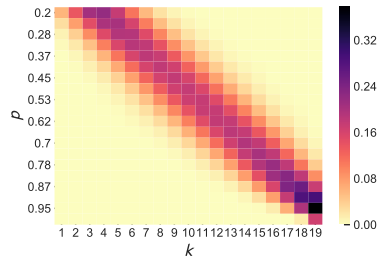

In [78]:
##Keeping n constant

n = 20 

ps = np.linspace(0.2, 0.99, 20)

ks = np.arange(1, 20)

ps_plot = []

ks_plot = []

binom_pmfs = []

for i in ps:
    for j in ks:
        ps_plot.append(np.round(i,2))
        ks_plot.append(j)
        binom_pmfs.append(st.binom.pmf(p = i, k = j, n = n))

df = pd.DataFrame({'$p$':ps_plot, '$k$':ks_plot , 'PMF': binom_pmfs})

pivoted_binom = df.pivot('$p$', '$k$', 'PMF')

sns.heatmap(pivoted_binom, cmap = 'magma_r')        

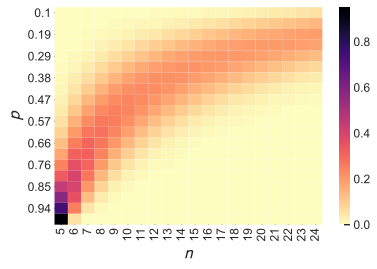

In [80]:
##Keeping k constant

k = 5

ps = np.linspace(0.1, 0.99, 20)

ns = np.arange(5, 25)

ps_plot = []

ns_plot = []

binom_pmfs = []

for i in ps:
    for j in ns:
        ps_plot.append(np.round(i,2))
        ns_plot.append(j)
        binom_pmfs.append(st.binom.pmf(p = i, k = k, n = j))
        
df = pd.DataFrame({'$p$':ps_plot, '$n$':ns_plot , 'PMF': binom_pmfs})

pivoted_binom = df.pivot('$p$', '$n$', 'PMF')

sns.heatmap(pivoted_binom, cmap = 'magma_r');

### Poisson distribution

* **Story.**  Rare events occur with a rate $\lambda$ per unit
time.  There is no "memory" of previous events; i.e., that rate is
independent of time. A process that generates such events is called a *Poisson process*. The occurrence of a rare event in this context is referred to as an *arrival*. The number $k$ of arrivals in unit time is Poisson distributed.

* **Parameter.** The single parameter is the rate $\lambda$ of
the rare events occurring.

* **Example.** The number of mutations in a strand of DNA per
unit length (since mutations are rare) are Poisson distributed.

* **Probability mass function.**
\begin{align}
f(k;\lambda) = \frac{\lambda^k}{k!}\,\mathrm{e}^{-\lambda}.
\end{align}

* **Notes.**
The Poisson distribution is a limit of the binomial distribution in
which the number of trials goes to infinity, but the expected number
of successes, $np$, stays fixed.  Thus,
\begin{align}
f_\mathrm{Poisson}(k;\lambda) \approx f_\mathrm{Binomial}(k;n, p),
\end{align}
with $\lambda = np$.  Considering the biological example of mutations,
this is binomially distributed: There are $n$ bases, each with a
probability $p$ of mutation, so the number of mutations, $k$ is
binomially distributed.  Since $p$ is small, it is approximately
Poisson distributed.

In [29]:
ks = np.arange(0,21)
mus = np.arange(1, 20)

In [31]:
ks_plot = []
mus_plot = []
poisson_pmfs = []

for i in ks:
    for j in mus:
        ks_plot.append(i)
        mus_plot.append(j)
        poisson = st.poisson.pmf(k = i, mu = j)
        poisson_pmfs.append(poisson)

In [32]:
len(poisson_pmfs)

399

In [33]:
df = pd.DataFrame({'$\mu$':mus_plot, 'k':ks_plot , 'PMF': poisson_pmfs})

pivoted = df.pivot('$\mu$', 'k', 'PMF')

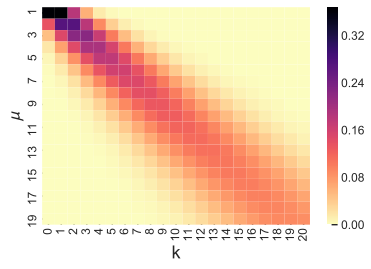

In [35]:
sns.heatmap(pivoted, cmap= 'magma_r');

### Hypergeometric distribution

* **Story.** Consider an urn with $w$ white balls and $b$ black
balls.  Draw $n$ balls from this urn without replacement.  The number
white balls drawn, $k$, is Hypergeometrically distributed.

* **Parameters.** There are three parameters: the number of
draws $n$, the number of white balls $w$, and the number of black
balls $b$.

* **Example.** There are $N$ finches on an island, and $n_t$ of
them are tagged.  You capture $n$ finches.  The number of tagged
finches $k$ is Hypergeometrically distributed, $f(k;n_t, N-n_t, n)$,
as defined below.

* **Probability mass function.**

\begin{align}
f(k;w, b, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}b\\n-k\end{pmatrix}}
{\begin{pmatrix}w+b\\n\end{pmatrix}}.
\end{align}
Alternatively, if we define $N = w + b$, we could write
\begin{align}
f(k;N, w, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}N-w\\n-k\end{pmatrix}}
{\begin{pmatrix}N\\n\end{pmatrix}}.
\end{align}
This is how it is [defined in the `scipy.stats` module](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.hypergeom.html). In general, because distributions have different equivalent representations, it is important to check the documentation to make sure you are using the function correctly.


* **Notes.** This distribution is analogous to the Binomial
distribution, except that the Binomial distribution describes draws
from an urn *with* replacement.  In the analogy, $p = w/(w+b)$.

When using the sliders below, you will only get a plot if $N \le w$ and $N \le n$ because the distribution is only defined for these values.

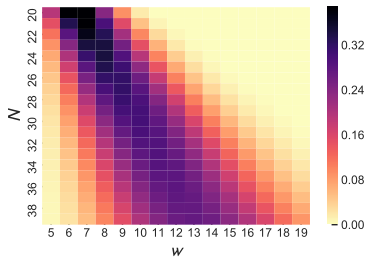

In [93]:
##Keeping n and k constant, varying w and N

k = 5 # white balls drawn
n = 15 # sample size

ws = np.arange(5, 20) #total number of white balls

Ns = np.arange(20, 40) #total num of balls 

ws_plot = []

Ns_plot = []

hypergeom_pmfs = []

for i in ws:
    for j in Ns:
        ws_plot.append(i)
        Ns_plot.append(j)
        hypergeom_pmfs.append(st.hypergeom.pmf(k = k, N = n, n = i, M = j))
        
df = pd.DataFrame({'$N$':Ns_plot, '$w$':ws_plot , 'PMF': hypergeom_pmfs})

pivoted_hypergeom = df.pivot('$N$', '$w$', 'PMF')

sns.heatmap(pivoted_hypergeom, cmap = 'magma_r');

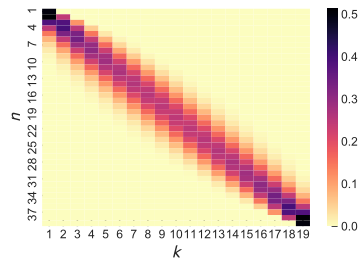

In [106]:
##Keeping M and N constant, varying k and n

M = 40 # total no of objects
N = 20 # sample size

ns = np.arange(1, 40) # total number of white balls
ks = np.arange(1, 20) # drawn white objects

ks_plot = []
ns_plot = []
hypergeom_pmfs = []

for i in ns:
    for j in ks:
        ns_plot.append(i)
        ks_plot.append(j)
        hypergeom_pmfs.append(st.hypergeom.pmf(k = j, N = N, n = i, M = M))
        
df = pd.DataFrame({'$k$':ks_plot, '$n$':ns_plot , 'PMF': hypergeom_pmfs})

pivoted_hypergeom = df.pivot('$n$', '$k$', 'PMF')

sns.heatmap(pivoted_hypergeom, cmap = 'magma_r');

## Continuous probability distributions 

### Gaussian, a.k.a. Normal, distribution

* **Story.** Any quantity that emerges as the sum of a large number of
subprocesses tends to be Gaussian distributed provided none of the
subprocesses is very broadly distributed.

* **Parameters.** The Gaussian distribution has two parameters,
the mean $\mu$, which determines the location of its peak, and the
standard deviation $\sigma$, which is strictly positive (the
$\sigma\to 0$ limit defines a Dirac delta function) and determines the
width of the peak.

* **Example.** We measure the length of many *C. elegans*
eggs.  The lengths are Gaussian distributed.

* **Probability density function.**

\begin{align}
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}}\,\mathrm{e}^{-(x-\mu)^2/2\sigma^2}.
\end{align}

* **Notes.** This is a limiting distribution in the sense of the
central limit theorem, but also in that many distributions have a
Gaussian distribution as a limit.  This is seen by formally taking
limits of, e.g., the Gamma, Student-t, Binomial distributions, which
allows direct comparison of parameters.

### Chi-square distribution

* **Story.** If $X_1$,
$X_2$, $\ldots$, $X_n$ are Gaussian distributed,
$X_1^2 + X_2^2 + \cdots + X_n^2$ is $\chi^2$-distributed. See also the story of the [Gamma distribution](#Gamma-distribution), below.

* **Parameters.** There is only one parameter, the degrees of
freedom $n$.

* **Probability density function.**
\begin{align}
  f(x;n) \equiv \chi^2_n(x;n) = \frac{1}{2^{n/2}\Gamma\left(\frac{n}{2}\right)}\,
x^{\frac{n}{2}-1}\,\mathrm{e}^{-x/2}.
\end{align}

* **Notes.** The Chi-square distribution is a special case of the [Gamma distribution](#Gamma-distribution) with $a = n/2$ and $r = 1/2$.

### Student-t/Cauchy distribution

* **Story.**  We get this distribution whenever we marginalize
an unknown $\sigma$ out of a Gaussian distribution with a Jeffreys
prior for $\sigma$.

* **Parameters.** The Student-t distribution is peaked, and its
peak is located at $m$.  The peak's width is dictated by parameter
$s$.  Finally, we define the "degrees of freedom" as $n$.

* **Example.** The story says it all!

* **Probability density function.**

\begin{align}
f(x;m, s, n) = \frac{\Gamma\left(\frac{n+1}{2}\right)}{\Gamma\left(\frac{n}{2}\right)\sqrt{\pi n s^2}}\,
\left(1 + \frac{(x-m)^2}{ns^2}\right)^{-\frac{n+1}{2}}.
\end{align}

Another parametrization, importantly the one used by PyMC3, defines $\mu = m$, $\nu = n$ and $\lambda = s^{-2}$, giving
\begin{align}
f(x;\mu, \lambda, \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\left(\frac{\lambda}{\pi \nu}\right)^{\frac{1}{2}}\,
\left(1 + \frac{\lambda(x-\mu)^2}{\nu}\right)^{-\frac{\nu+1}{2}}.
\end{align}


**Notes.** For $n\to \infty$, we get a Gaussian distribution.
When $n = 1$, we get the **Cauchy distribution**,
\begin{align}
f(x;m, s) = \left[\pi s\left(1+ \left(\frac{x-m}{s}\right)^2\right)\right]^{-1}.
\end{align}
The Student-t distribution is very much like a Gaussian distribution, except with heavy tails. In the Cauchy limit, the tails are so heavy that the first moment does not exist.

### Exponential distribution

* **Story.** This is the waiting time for an arrival from a
Poisson process.  I.e., the inter-arrival time of a Poisson process is
Exponentially distributed.

* **Parameter.** The single parameter is the average arrival
*rate*, $r$. Alternatively, we can use $\tau=1/r$ as the parameter, in this case a characteristic arrival *time*.

**Example.** The time between conformational switches in a
protein is Exponentially distributed (under simple mass action
kinetics).

**Probability density function.**
\begin{align}
f(x;r) = r \mathrm{e}^{-rx}.
\end{align}

Alternatively, we could parametrize it as

\begin{align}
f(x;\tau) = \frac{1}{\tau}\, \mathrm{e}^{-x/\tau}.
\end{align}


**Notes.** The Exponential distribution is the continuous
analog of the Geometric distribution.  The "rate" in the Exponential
distribution is analogous to the probability of success of the
Bernoulli trial. Note also that because they are uncorrelated, the
amount of time between any two arrivals is independent of all other
inter-arrival times.

The implementation in the `scipy.stats` module also has a location parameter, which shifts the distribution left and right. For our purposes, you can ignore that parameter, but be aware that `scipy.stats` requires it.

### Gamma distribution

* **Story.** The amount of time we have to wait for $a$ arrivals
of a Poisson process.  More concretely, if we have events, $X_1$,
$X_2$, $\ldots$, $X_a$ that are exponentially distributed,
$X_1 + X_2 + \cdots + X_a$ is Gamma distributed.

* **Parameters.** The number of arrivals, $a$, and the rate of
arrivals, $r$.

* **Example.** Any multistep process where each step happens at
the same rate.  This is common in molecular rearrangements, and we
will use it in class to describe the nature of processes triggering
microtubule catastrophe.

* **Probability density function.**

\begin{align}
f(x;a, r) = \frac{1}{\Gamma(a)}\,\frac{(rx)^a}{x}\,\mathrm{e}^{-rx},
\end{align}

where $\Gamma(a)$ is the gamma function.

* **Notes.** The Gamma distribution is the continuous
analog of the Negative Binomial distribution. The special case of $a = n/2$ and $r = 1/2$ is a Chi-square distribution.